In [120]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

df = pd.read_csv('sales data-set.csv', index_col='Date', parse_dates=True, dayfirst=True)

In [121]:
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

In [122]:
S1D1 = df[(df['Store'] == 1) & (df['Dept'] == 1)]['Weekly_Sales']

In [123]:
S1D1.index.freq = pd.infer_freq(S1D1.index)
S1D1.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq='W-FRI')

In [78]:
train = S1D1.iloc[:112]
test = S1D1.iloc[112:]

In [79]:
train

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
                ...   
2012-02-24    20124.22
2012-03-02    20113.03
2012-03-09    21140.07
2012-03-16    22366.88
2012-03-23    22107.70
Name: Weekly_Sales, Length: 112, dtype: float64

In [82]:
len(test)

31

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=52).fit()

/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [104]:
test_predictions = fitted_model.forecast(31).rename('HW Forecast')

In [105]:
test_predictions

2012-03-30    48850.463067
2012-04-06    37105.013807
2012-04-13    15386.293930
2012-04-20    14287.966465
2012-04-27    14828.219508
2012-05-04    15787.758908
2012-05-11    17369.688686
2012-05-18    13723.959444
2012-05-25    14650.837185
2012-06-01    16712.338099
2012-06-08    16030.033167
2012-06-15    15815.077118
2012-06-22    16119.621342
2012-06-29    16321.088127
2012-07-06    17891.872284
2012-07-13    17559.993783
2012-07-20    15919.424868
2012-07-27    16136.351691
2012-08-03    18591.600332
2012-08-10    16699.733429
2012-08-17    17125.508164
2012-08-24    17394.122557
2012-08-31    18106.244415
2012-09-07    20531.489281
2012-09-14    22106.875033
2012-09-21    20953.246747
2012-09-28    23516.792667
2012-10-05    27706.564229
2012-10-12    32350.650610
2012-10-19    31004.465272
2012-10-26    47475.644417
Freq: W-FRI, Name: HW Forecast, dtype: float64

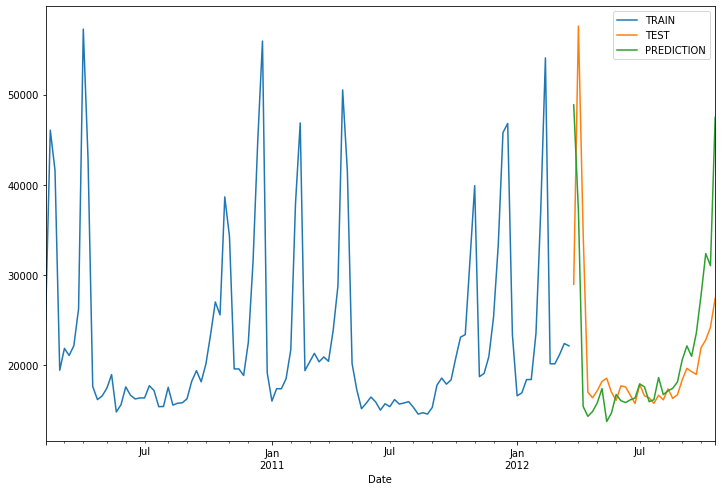

In [106]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')

In [107]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, test_predictions))

In [108]:
rmse

7734.101703869985

In [109]:
test.mean()

20351.268387096778